# Análise e Previsão da Qualidade dos Vinhos com Python

O vinho é um dos produtos mais complexos e fascinantes para análise, pois sua qualidade é influenciada por diversas características químicas. Estudar essas propriedades pode nos ajudar a entender e até prever a qualidade de diferentes tipos de vinho.

Vamos explorar o conjunto de dados Wine Quality , que contém informações sobre várias características químicas de vinhos tintos e brancos, junto com uma avaliação de qualidade para cada um deles. Vamos realizar uma análise exploratória desses dados e aplicar um modelo preditivo em Python para prever a qualidade dos vinhos com base em suas propriedades químicas.

### Passo 1: Importando como Bibliotecas
Primeiro, importaremos as bibliotecas possíveis.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Passo 2: Carregando a Base de Dados
Usaremos o Wine Quality Dataset , que está disponível em formato CSV. Existem duas versões, uma para vinho tinto e outra para vinho branco.


In [3]:
# Carregando dados
red_wine = pd.read_csv("winequality-red.csv", sep=';')
white_wine = pd.read_csv("winequality-white.csv", sep=';')


### Passo 3: Explorando os Dados
Vamos explorar as primeiras linhas do conjunto de dados e verificar as variáveis ​​disponíveis.

In [4]:
print(red_wine.head())
print(white_wine.info())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           8.76              0.64         0.43            2.28      0.056   
1           9.09              0.60         0.39            3.10      0.081   
2           7.80              0.44         0.24            2.17      0.101   
3           8.45              0.58         0.09            2.50      0.094   
4           9.64              0.55         0.42            1.85      0.067   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                13.14                 48.41  0.99488  3.40       0.58   
1                19.27                 51.82  0.99254  3.42       0.74   
2                27.65                 63.05  0.99597  3.15       0.61   
3                22.43                 33.26  0.99400  3.32       0.65   
4                15.15                 49.84  0.99489  3.21       0.75   

   alcohol  quality  
0    11.03        3  
1    10.11        7  
2    13.03        7 

Os conjuntos de dados contêm variáveis ​​como acidez fixa, acidez volátil, açúcar residual, pH, sulfatos, entre outros. A coluna qualitycontém a nota de qualidade dada ao vinho, que varia entre 0 e 10.

#### Estatísticas Descritivas
Para entender melhor os dados, vamos gerar algumas estatísticas descritivas:

In [5]:
print(red_wine.describe())
print(white_wine.describe())


       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1000.000000       1000.000000  1000.000000     1000.000000   
mean        8.279350          0.597820     0.301290        2.501930   
std         0.967932          0.101939     0.097966        1.010195   
min         4.480000          0.280000    -0.000000       -0.250000   
25%         7.660000          0.530000     0.230000        1.850000   
50%         8.260000          0.600000     0.310000        2.475000   
75%         8.920000          0.670000     0.370000        3.180000   
max        11.600000          0.940000     0.620000        5.940000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1000.000000           1000.00000           1000.000000  1000.000000   
mean      0.079272             15.04072             44.547720     0.995992   
std       0.019925              5.08792             12.152842     0.001992   
min       0.022000             -1.92000         

Essas estatísticas ajudam a identificar a mídia, o desvio padrão e os valores extremos de cada variável.

### Passo 4: Análise Visual
Podemos usar gráficos para entender melhor a distribuição dos dados e a relação entre as variáveis.

Distribuição da Qualidade

Vamos verificar a distribuição da variável ***quality:***

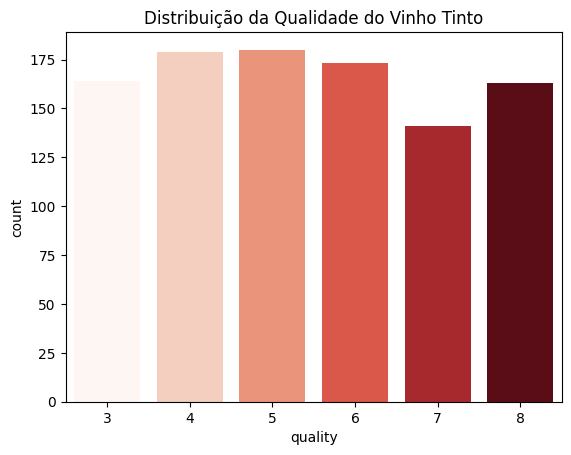

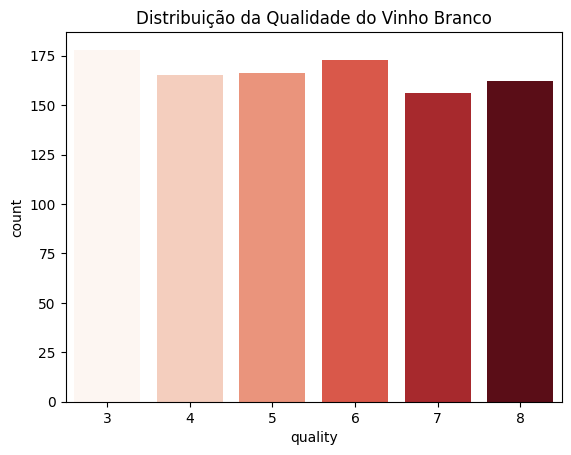

In [8]:
# Plot da distribuição da qualidade do vinho tinto
sns.countplot(data=red_wine, x='quality', hue='quality', palette='Reds', legend=False)
plt.title('Distribuição da Qualidade do Vinho Tinto')
plt.show()

# Plot da distribuição da qualidade do vinho branco
sns.countplot(data=white_wine, x='quality', hue='quality', palette='Reds', legend=False)
plt.title('Distribuição da Qualidade do Vinho Branco')
plt.show()

#### Correlação entre as Variáveis
Usando um mapa de calor, podemos ver a transparência entre as variáveis:

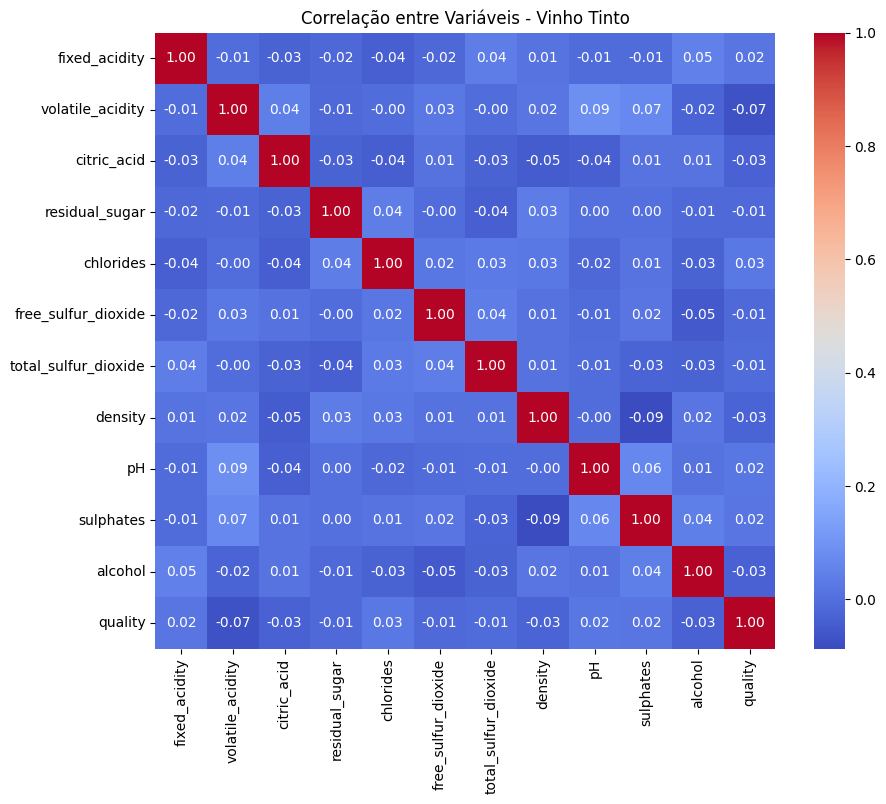

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(red_wine.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis - Vinho Tinto')
plt.show()


###Passo 5: Preparação dos Dados para o Modelo
Para prever a qualidade, vamos dividir os dados em variáveis ​​independentes (features) e dependentes (target).

In [10]:
X_red = red_wine.drop('quality', axis=1)
y_red = red_wine['quality']

# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.3, random_state=42)


### Passo 6: Construindo o Modelo de Classificação
Usaremos o algoritmo ***RandomForestClassifier*** para prever a qualidade dos vinhos.

In [11]:
# Modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Previsão e Avaliação
y_pred = rf_model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Relatório de Classificação
print(classification_report(y_test, y_pred))

Acurácia: 0.11666666666666667
              precision    recall  f1-score   support

           3       0.08      0.18      0.11        34
           4       0.11      0.13      0.12        55
           5       0.16      0.15      0.15        53
           6       0.12      0.21      0.16        48
           7       0.06      0.02      0.03        48
           8       0.19      0.05      0.08        62

    accuracy                           0.12       300
   macro avg       0.12      0.12      0.11       300
weighted avg       0.13      0.12      0.11       300



#### Matriz de Confusão
Para visualizar o desempenho do modelo, vamos traçar a matriz de confusão.

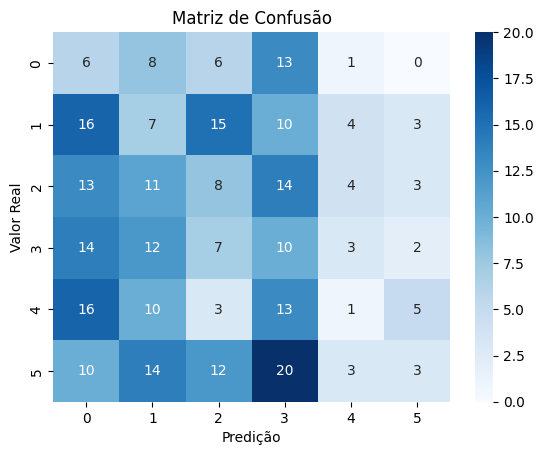

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.show()

### Conclusão
A matriz de confusão revela que nosso modelo enfrenta desafios para prever com precisão as diferentes classes de qualidade do vinho. Observamos uma tendência de confusão entre classes próximas, o que indica que o modelo possui dificuldade em distinguir vinhos com qualidades semelhantes. Esse comportamento é comum em problemas de classificação onde as classes têm características semelhantes, como é o caso das diferentes qualidades de vinho.

Para melhorar o desempenho do modelo, algumas abordagens poderiam ser exploradas, como o ajuste de hiperparâmetros, a experimentação com algoritmos mais avançados e a aplicação de técnicas de engenharia de características. Além disso, o balanceamento das aulas pode ser uma opção caso haja um desequilíbrio nas amostras de cada aula.

Embora o modelo atual apresente um ponto de partida interessante, é possível otimizar a análise para obter informações mais precisas. Com melhorias adicionais, podemos construir um modelo que ajude a prever a qualidade do vinho de forma mais confiável, apoiando decisões e avaliações sobre a produção vinícola.